<a href="https://colab.research.google.com/github/shawk17/563-shawk17/blob/main/hw_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example 2.2
From the Shell Thermodynamics textbook.

In [ ]:
import numpy as np

def energy(system, epsilon = -1):
  energy = 0
  for i, sub_system in enumerate(system):
    for j, part in enumerate(sub_system):
      for neighbor in [[i+1,j], [i-1,j], [i,j+1], [i,j-1]]:
        try:
          if neighbor[0] >= 0 and neighbor[1] >= 0:
            energy += epsilon * system[neighbor[0], neighbor[1]] * system[i,j]
        except IndexError:
          pass
  return energy//2

a = np.zeros((4,4))
a[0,0] = 1
a[0,2] = 1
print(f'{a}\nenergy: {energy(a)}\n')
a[0,1] = 1
a[0,2] = 0
print(f'{a}\nenergy: {energy(a)}\n')
a[0,3] = 1
a[1,3] = 1
print(f'{a}\nenergy: {energy(a)}\n')

[[1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
energy: 0.0

[[1. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
energy: -1.0

[[1. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
energy: -2.0



## Problem 2.8
Stirilings's approximation:
$$\ln{n!} ≈ n \ln{n} - n → n! ≈ (n/e)^n$$
Combinations without replacement:
$$_n C_k = \begin{pmatrix}n\cr k\end{pmatrix} = \frac{n!}{k!(n-k)!}$$
Proof:
$$x = k/n$$
$$\ln_n C_k = \ln{n!} - \ln{(k!(n-k)!)}$$
$$ = n\ln{n}-n - k\ln{k} + k - (n-k)\ln{(n-k)} + (n-k)$$
$$ = n\ln{n} - k\ln{k} - (n-k)\ln{(n-k)}$$
$$ = n(\ln{n} - k/n\ln{k} - (n-k)/n\ln{(n-k)})$$
$$ = n(\ln{n} - x\ln{k} - \ln{(n-k)} + x\ln{(n-k)})$$
$$ = n(\ln{\frac{n}{n-k}} + x\ln{\frac{n-k}{k}})$$
$$ = n(-\ln{(1-x)} + x\ln{(1/x-1)})$$
$$ = n(-\ln{(1-x)} + x\ln{\frac{1-x}{x}})$$
$$ = n(-\ln{(1-x)} + x\ln{(1-x)} - x \ln{x})$$
$$ = -n(x \ln{x}-(x-1)\ln{(1-x)})$$

## Stirling's Approximation
$$\ln{n!} ≈ n \ln{n} - n → n! ≈ (n/e)^n$$
Works well on a log scale :)

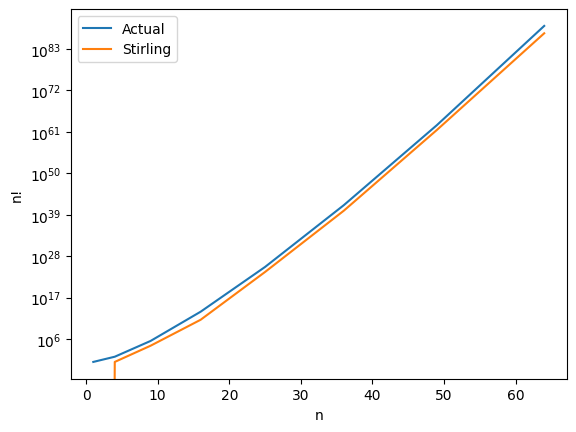

In [ ]:
from scipy.special import factorial
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,9)**2
y = factorial(x)
ys = (x//np.e)**x
plt.plot(x,y, label='Actual')
plt.plot(x,ys, label='Stirling')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('n!')
plt.legend()
plt.show()